# Hotel Bookings Demand visualization

In [315]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msn

%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [316]:
hotel_data = pd.read_csv(r'C:\Users\Ogidan\Desktop\hope\data sets\Hotel_data\hotel_bookings.csv')
hotel_data.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [317]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [318]:
hotel_data.isnull().sum().sort_values(ascending = False)


# hotel_data


company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [319]:
hotel_data.drop('company',axis=1, inplace=True)

In [320]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## Filling The Missing Values

In [321]:
#fill null values
hotel_data["agent"]= hotel_data["agent"].fillna(hotel_data["agent"].median())
hotel_data["children"]= hotel_data["children"].fillna(hotel_data["children"].median())
hotel_data["country"]= hotel_data["country"].fillna(hotel_data["country"].mode()[0])


#replace undefined with null values

c = hotel_data['market_segment'] == 'Undefined'
hotel_data = hotel_data.replace(c,np.nan)

#total number of people visiting the hostel
hotel_data['total_people'] = hotel_data['adults'] + hotel_data['children'] + hotel_data['babies']

#remove the days in which no adults visited to get a proper representation
hotel_data = hotel_data[hotel_data['adults'] != 0]

### Hotel type

<AxesSubplot:xlabel='hotel', ylabel='count'>

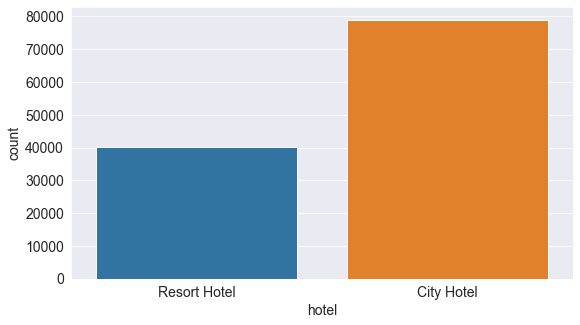

In [322]:
sns.countplot(x= 'hotel',data = hotel_data)

from the chart, we can see that two times the sample population lodge in city hotels more

### Cancelled bookings 

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

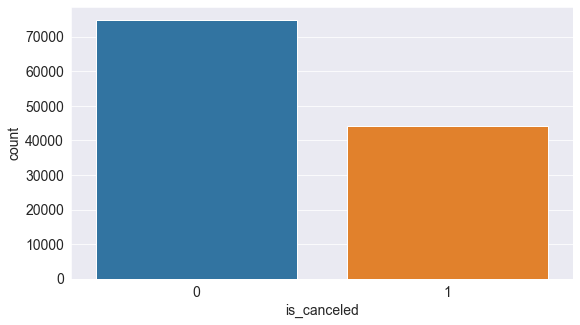

In [323]:
sns.countplot(x= 'is_canceled',data = hotel_data)

 from this plot, we can see that at least half of the total number of people who booked cancelled their bookings

## Deposit type

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

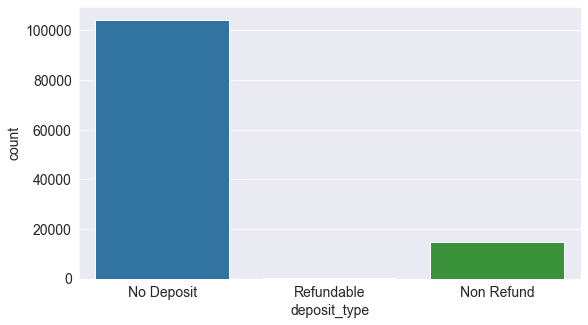

In [324]:
sns.countplot(x= 'deposit_type',data = hotel_data)

we can observe that the number of people who didnt deposit is quite high

### Customer type of different market segments

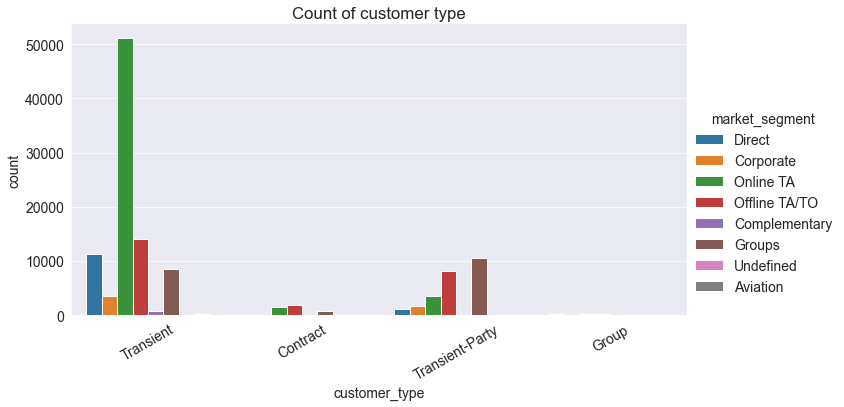

In [325]:

sns.catplot(x = 'customer_type',hue ='market_segment',data = hotel_data, kind = 'count',aspect=2)
plt.title('Count of customer type')
plt.xticks(rotation=30);

The number of transient customers in this data is quite high compared to other groups of customers. This is usually the case in many hotels as many people only stay at the hotel for just a short period of time

### Reservation Status

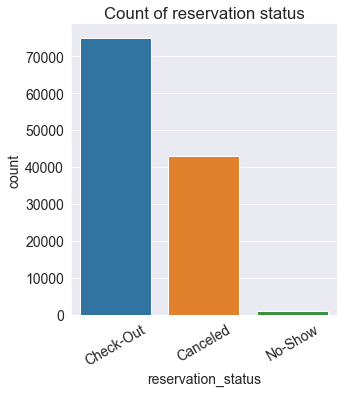

In [326]:
sns.catplot(x = 'reservation_status',data = hotel_data, kind = 'count')
plt.title('Count of reservation status')
plt.xticks(rotation=30);

### Arrival Months

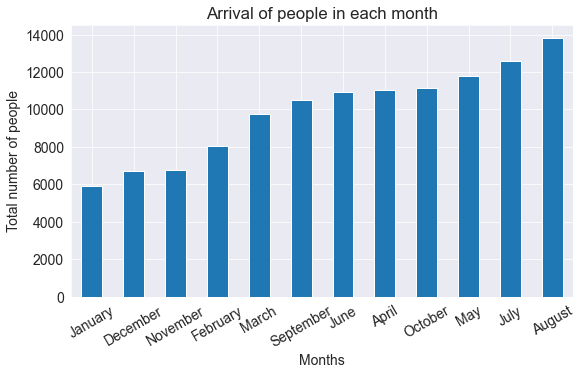

In [327]:
hotel_data['arrival_date_month'].value_counts(ascending= True).plot(kind ='bar')
plt.title('Arrival of people in each month')
plt.xlabel('Months')
plt.ylabel('Total number of people')
plt.xticks(rotation=30);



From this graph, we can see that more people arrive in the hotel in the month of august which makes perfect sense because the month of august falls in the summer break of the nothern hemiphere while the lowest falls to the month of january which is quite explanable because january is the beginning pf the year and book tend to focus more on work

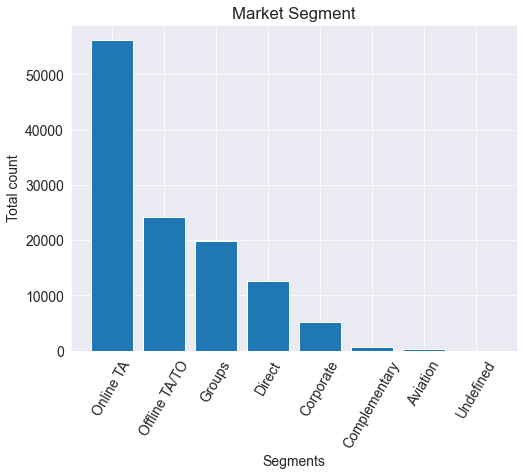

In [328]:
# condition = hotel_data['market_segment'] != 'Undefined'

plt.figure(figsize=(8,6))
plt.xticks(rotation= 60)
segment = hotel_data['market_segment'].value_counts()

plt.bar(x= segment.index, height= segment,)
plt.xlabel('Segments')
plt.ylabel('Total count')
plt.title('Market Segment')
plt.show()


#remove undefined from this column

A good number of people who use this hotels belong to the online TA market segment

### Reserved room type 

Text(0.5, 1.0, 'Count of reserved rooms')

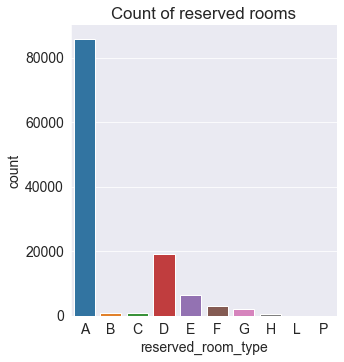

In [329]:
sns.catplot(x = 'reserved_room_type',data = hotel_data, kind = 'count', order =['A','B','C','D','E','F','G','H','L','P'])
plt.title('Count of reserved rooms')
# plt.xticks(rotation=30);

For some reasons, the room A type has the hieghest number of reserved rooms. probably it belongs to the special suites in the hotel 

#### I am going to extract the date features for the reserved_status_day

In [330]:
hotel_data["reservation_status_date"] = pd.to_datetime(hotel_data["reservation_status_date"])

# Extract date features
def extract_date_info(df, cols):
    for feat in cols:
        df[feat + "_year"] = df[feat].dt.year
        df[feat + "_day"] = df[feat].dt.day
        df[feat + "_month"] = df[feat].dt.month
        df[feat + "_quarter"] = df[feat].dt.quarter
        df[feat + "_weekday"] = df[feat].dt.weekday
        df[feat + "_week"] = df[feat].dt.isocalendar().week
    df.drop(columns=cols,axis=1,inplace=True)


extract_date_info(hotel_data, ["reservation_status_date"])


date_dic = {
    "January" : 1,
    "February" : 2,
    "March" :3 ,
    "April" :4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
    "September" : 9,
    "October" : 10,
    "November" : 11,
    "December" : 12,
}


# hotel_data



### Is cancelled vs lead time

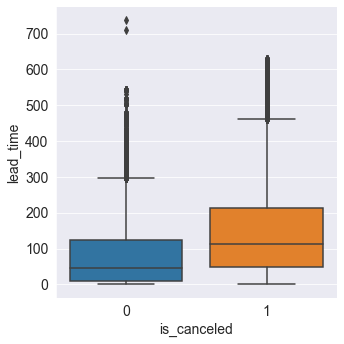

In [331]:
sns.catplot(y= 'lead_time', x = 'is_canceled', data = hotel_data, kind = 'box',)

People who cancelled their booking have an higher lead time on average than those who didn't cancel theirs. An higher variance also exists among those who didn't cancel their booking

### Which day do people arrive most at the hotel

<Figure size 1440x1080 with 0 Axes>

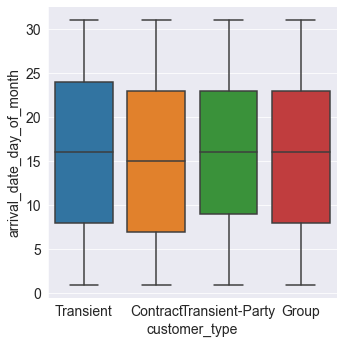

In [332]:
plt.figure(figsize=(20,15))
sns.catplot(data = hotel_data, x ='customer_type' , y= 'arrival_date_day_of_month' ,kind='box')
plt.show();

From this plot, we can see that most customers arrive on the 15th day of the month

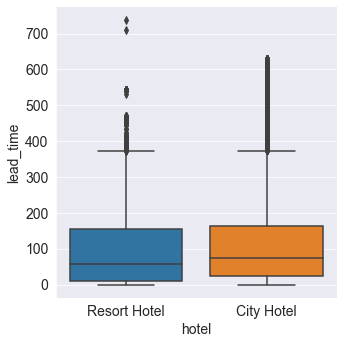

In [333]:
# sns.catplot(x = 'arrival_date_month', y = 'stays_in_week_nights',data = hotel_data, kind = 'bar')
# hotel_data  customer_type  

sns.catplot(data = hotel_data, x ='hotel' , y= 'lead_time' ,kind='box')

## which month of the year has the hieghest number of cancelled booking

In [334]:
hotel_data["arrival_date_month"] = hotel_data["arrival_date_month"].map(date_dic)





<AxesSubplot:>

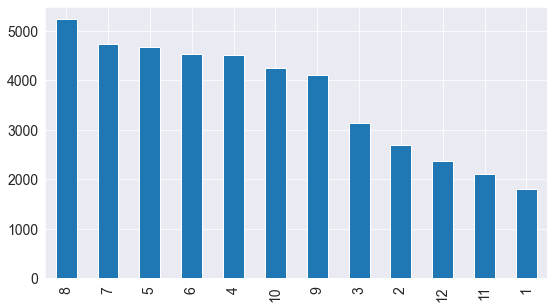

In [335]:
# f = hotel_data.groupby('arrival_date_month')['is_canceled'].mean().plot(kind='pie')
# f.sort_values()

con =  hotel_data['is_canceled'] == 1

hotel_data[con]['arrival_date_month'].value_counts().plot(kind = 'bar')


### Which customers cancel bookings most

<AxesSubplot:>

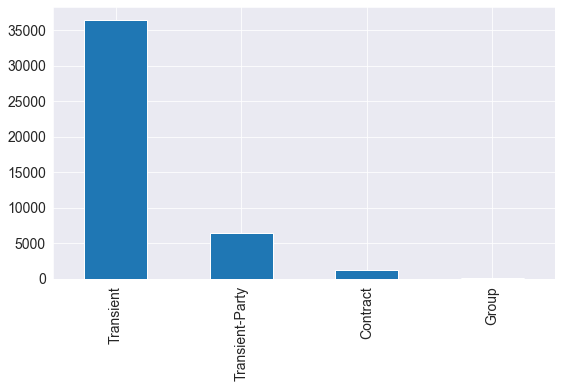

In [336]:


hotel_data[hotel_data['is_canceled'] == 1]['customer_type'].value_counts().plot(kind = 'bar')

The transient customers are the ones who cancel hotel bookings most

### Which meal do customers prefer more

In [337]:
hotel_data['meal'].agg(['value_counts'])

,value_counts
BB,92020
HB,14454
SC,10546
Undefined,1169
FB,798


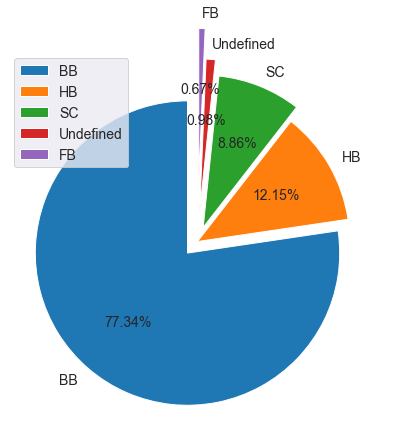

In [338]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = hotel_data.meal.value_counts()

plt.figure(figsize = (10, 7))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.4), autopct = "%.2f%%",startangle = 90);

plt.legend()

plt.show();

From here, we can see that a lot of customers prefer breakfast in bed(BB) while just a few prefer FB

### Which year is the most busy year

In [339]:
hotel_data['arrival_date_year'].agg(['value_counts'])

,value_counts
2016,56478
2017,40557
2015,21952


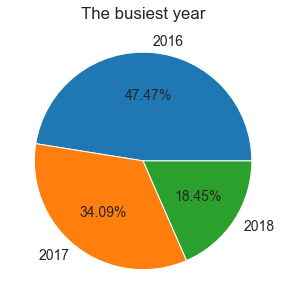

In [340]:
year=['2016','2017','2018']
vals = hotel_data['arrival_date_year'].value_counts()

plt.title('The busiest year')
plt.pie(vals,labels = year,autopct = "%.2f%%" );

2016 is the most busiest year

### Which country do the most frequent visitors come from

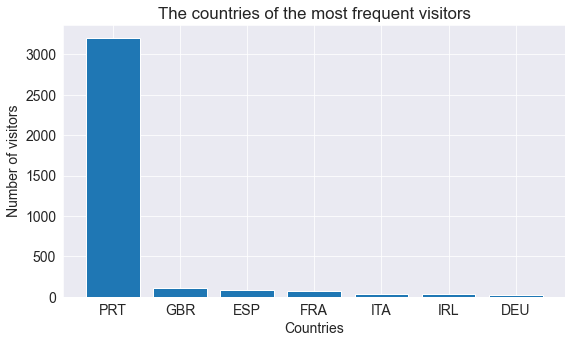

In [341]:
fre_country = hotel_data[hotel_data['is_repeated_guest'] == 1]['country'].value_counts().reset_index()

#Select countries with visitors more than 20
fre_country = fre_country[fre_country['country'] > 20 ].set_index('index')

plt.title('The countries of the most frequent visitors')
plt.bar(height= fre_country.country, x = fre_country.index)
plt.xlabel('Countries')
plt.ylabel('Number of visitors')
plt.show();


A lot of the hotels visitor come from PRT

### Which market segment has the heighest stay in weekend night

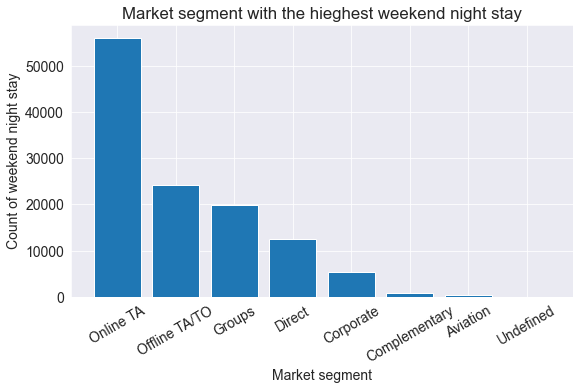

In [342]:
segment =  hotel_data.groupby('market_segment')['stays_in_weekend_nights'].count().sort_values(ascending = False)

plt.title('Market segment with the hieghest weekend night stay')
plt.bar(height= segment, x = segment.index)
plt.xlabel('Market segment')
plt.ylabel('Count of weekend night stay')
plt.xticks(rotation = 30)
plt.show();


### What type of meals do the repeated guests enjoy most

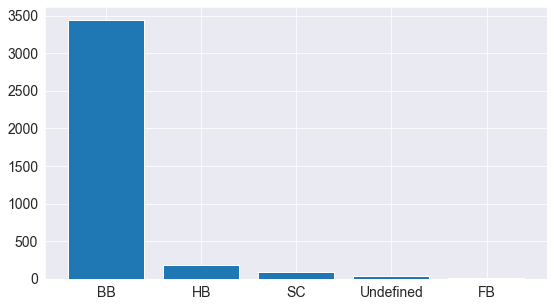

In [343]:
meals = hotel_data[hotel_data['is_repeated_guest'] == 1]['meal'].value_counts()
meal_label = ["BB", "HB", "SC", "Undefined", "FB"]


plt.bar(x = meal_label, height=meals )

# plt.pie(meals, labels=meal_label ,autopct = "%.2f%%", explode = (0.1,0.2,0.3,0.4,1))
plt.show()

## Modelling

In [344]:
# to convert categorical variables into numeric
hotel_dummies= pd.get_dummies(hotel_data)

In [345]:
X= hotel_dummies.drop(columns= "is_canceled")
Y= hotel_dummies["is_canceled"]



In [346]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# to standardise the data

scaler = StandardScaler()
x= scaler.fit_transform(X)
X = pd.DataFrame(x,columns= X.columns)


In [347]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score,classification_report,roc_auc_score

In [348]:
train_x, val_x, train_y, val_y= train_test_split(X,Y, test_size= 0.2, random_state= 100)
lr= LogisticRegression()
lr.fit(train_x,train_y)

test_pred= lr.predict(val_x)

test_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [349]:
print("Confusion matrix:", confusion_matrix(test_pred,val_y))




Confusion matrix: [[14943     0]
 [    0  8855]]


In [350]:
print("Accuracy:", f1_score(test_pred,val_y))

Accuracy: 1.0
